## Main Objective
The Main objective of this A/B testing is to examine what happens when the first gate in the game was moved from level 30 to level 40!  
When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

### Data Understanding
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. **userid**: A unique number that identifies each player.
2. **version**: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
3. **sum_gamerounds**: the number of game rounds played by the player during the first 14 days after install.
4. **retention_1**: Did the player come back and play 1 day after installing?
5. **retention_7**: Did the player come back and play 7 days after installing?  

When a player installed the game, he or she was randomly assigned to either.  
The dataset can be accessed at: [https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats/data]  

### Hypotheses:
**Null Hypothesis $H_0$:** Moving the first gate from level 30 to level 40 does not have any significant impact on player behavior.  
In other words, there is no statistical difference in key metrics (sum_gamerounds, retention_1, and retention_7) between players assigned to gate_30 (control) and gate_40 (treatment).

**Alternative Hypothesis $H_1$:** Shifting the first gate from level 30 to level 40 does lead to a statistically significant impact on player behavior.  
This means that at least one of the metrics (e.g., the number of game rounds played or retention rates) differs between the two groups.

### Key Metrics
#### Retention
1. **retention_1**: binary indicator (0/1) of whether the user returned on day 1.
2. **retention_7**: binary indicator (0/1) of whether the user returned on day 7.
#### Engagement
1. **sum_gamerounds**: total rounds played in the first 14 days

**Main Objective**: The primary objective is to evaluate the impact of changing the first gate’s position on early player metrics, including engagement and retention.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("datasets/cookie_cats.csv")

In [4]:
dataset.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
dataset.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Exploratory Data Analysis for Retention Key Metric
#### Is the distribution of players across the two groups (gate_30 and gate_40) balanced?

In [6]:
group_counts = dataset.groupby('version')['userid'].count()

In [7]:
group_counts.head()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

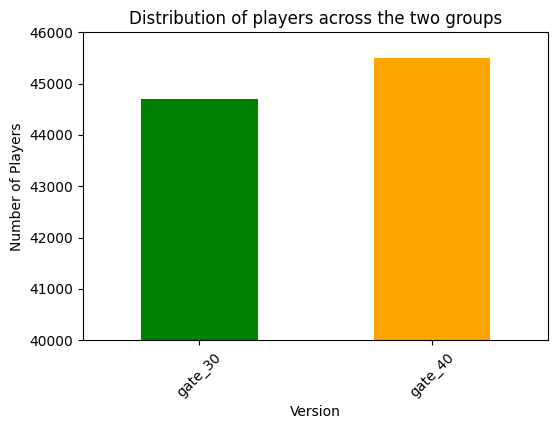

In [8]:
plt.figure(figsize=(6,4))
group_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Version')
plt.ylabel('Number of Players')
plt.title('Distribution of players across the two groups')
plt.xticks(rotation=45)
plt.ylim(40000, 46000)
plt.show()

> Distribution between gate_30 (44,700 players) and gate_40 (45,489 players) is fairly even, we can reasonably assume that randomization was properly executed during the A/B test!  
1. **No major bias in player assignment**: The test groups are comparable in size, meaning any differences in the results are more likely due to the change in gate position rather than an imbalance in sample sizes.
2. **Statistical robustness**: With both groups having large numbers, we can expect our hypothesis tests to have sufficient power to detect meaningful effects.

#### How do the average retention_1 and retention_7 rates compare between the two groups?

In [16]:
retention_rates = dataset.groupby('version')[['retention_1', 'retention_7']].mean()

In [17]:
retention_rates

,retention_1,retention_7
version,,
gate_30,0.448188,0.190201
gate_40,0.442283,0.182000


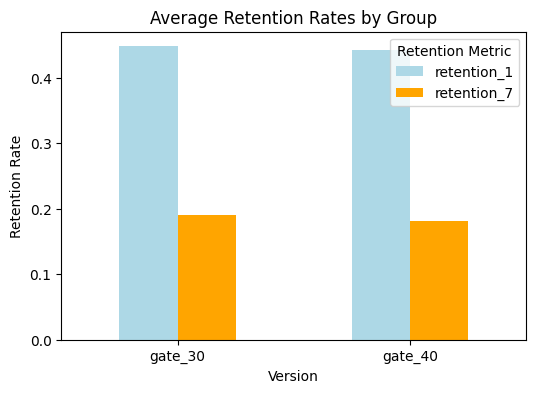

In [18]:
retention_rates.plot(kind='bar', figsize=(6, 4), color=['lightblue', 'orange'])
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.title('Average Retention Rates by Group')
plt.xticks(rotation=0)
plt.legend(title="Retention Metric")
plt.show()

> The retention rates are very similar between the two groups, indicating that moving the gate from level 30 to level 40 did not significantly impact player retention.

### Exploratory Data Analysis for Engagement Key Metric
#### What are the summary statistics (mean, median, variance, range) of sum_gamerounds for each group?

In [19]:
summary_stats = dataset.groupby('version')['sum_gamerounds'].agg([
    'mean', 'median', 'var'
])

In [20]:
summary_stats.head()

,mean,median,var
version,,,
gate_30,52.456264,17.0,65903.321897
gate_40,51.298776,16.0,10669.736422


> The means of both groups are close, suggesting that the overall average game rounds played are similar.  
> The medians are also close, which indicates that at least half of the players in both groups played less than 17 rounds.  
> The variance in gate_30 is significantly higher (65,903) compared to gate_40 (10,669).  
This suggests that player engagement in gate_30 is much more spread out, some players played an exceptionally large number of rounds, while others played very few. The lower variance in gate_40 indicates that player behavior was more consistent, meaning players were more clustered around the average rather than having extreme outliers.


#### Are there any noticeable outliers or anomalies in the sum_gamerounds data that might skew our results?

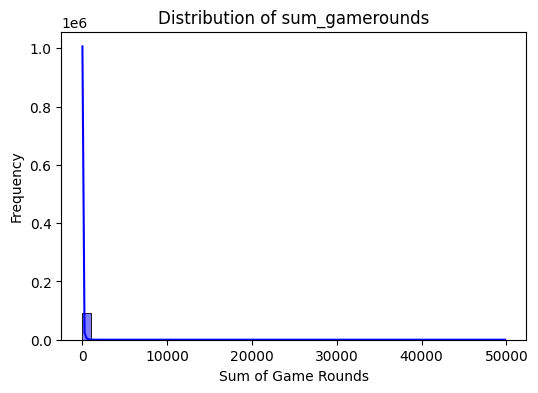

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(dataset['sum_gamerounds'], bins=50, kde=True, color='blue')
plt.xlabel('Sum of Game Rounds')
plt.ylabel('Frequency')
plt.title('Distribution of sum_gamerounds')
plt.show()

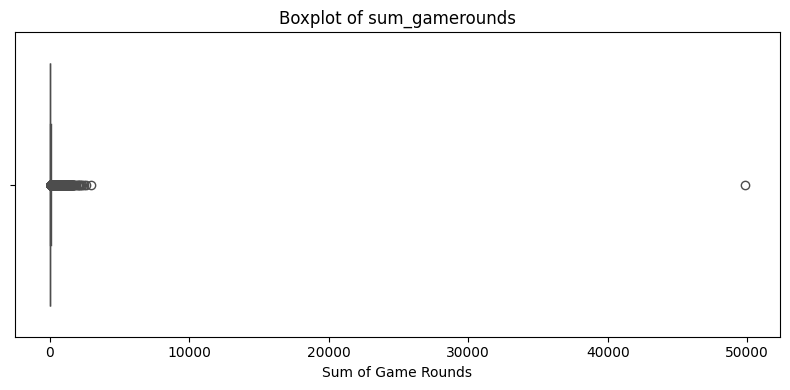

In [15]:
# Set figure size
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset['sum_gamerounds'], color='orange')
plt.xlabel('Sum of Game Rounds')
plt.title('Boxplot of sum_gamerounds')
# Show plots
plt.tight_layout()
plt.show()

> Yes, there are many outliers and the data is right skewed! There is one outlier (almost 50000 games round played) that significantly skew the data to the right.